In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import warnings
import pickle
from StockCLass import StockPredictor
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("data_set_ready_for_training.csv")
data.head()

,closing_price,news,momentum,EMA,MACD,RSI,ROI,ATR,williams,CCI,UO
0,975.0,"[[0.2306930273771286, 0.792356550693512, 0.642...",-87.0,1087.863864,-58.947313,0.149378,1.126154,106.0,0.820755,997.666667,0.154372
1,954.0,"[[0.31689509749412537, 0.8638337850570679, 0.6...",-2.0,1067.269422,-65.253876,0.250000,1.122642,38.0,1.000000,966.666667,0.105707
2,917.0,"[[0.31150949001312256, 0.7647785544395447, 0.6...",-75.0,1044.151049,-72.401798,0.480000,1.135878,75.0,1.000000,942.000000,0.069584
3,903.0,"[[0.1868913620710373, 0.7952941060066223, 0.61...",-87.0,1022.435502,-78.293327,0.000000,1.120598,87.0,1.000000,932.000000,0.068895
4,885.0,"[[0.3303453326225281, 0.8576347231864929, 0.68...",-90.0,1001.291578,-83.452392,0.000000,1.108927,90.0,1.000000,915.000000,0.108076


In [5]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()

In [6]:
data = data.drop("news", axis = 1)
data.head()

,closing_price,momentum,EMA,MACD,RSI,ROI,ATR,williams,CCI,UO
0,975.0,-87.0,1087.863864,-58.947313,0.149378,1.126154,106.0,0.820755,997.666667,0.154372
1,954.0,-2.0,1067.269422,-65.253876,0.250000,1.122642,38.0,1.000000,966.666667,0.105707
2,917.0,-75.0,1044.151049,-72.401798,0.480000,1.135878,75.0,1.000000,942.000000,0.069584
3,903.0,-87.0,1022.435502,-78.293327,0.000000,1.120598,87.0,1.000000,932.000000,0.068895
4,885.0,-90.0,1001.291578,-83.452392,0.000000,1.108927,90.0,1.000000,915.000000,0.108076


In [75]:
def get_weekly_cp(cps):
    weekly_cps = []
    for cp in range(len(cps)):
        weekly_cp = list(cps[cp+1:cp + 8])
        if len(weekly_cp) == 7:
            weekly_cps.append(weekly_cp)
    
    return pd.Series(weekly_cps)

In [76]:
temp = data["closing_price"]
weekly = get_weekly_cp(temp)
data["Target"] = weekly
data = data.dropna()
data.head(8)

,closing_price,momentum,EMA,MACD,RSI,ROI,ATR,williams,CCI,UO,Target
0,975.0,-87.0,1087.863864,-58.947313,0.149378,1.126154,106.0,0.820755,997.666667,0.154372,"[954.0, 917.0, 903.0, 885.0, 897.0, 947.0, 910.0]"
1,954.0,-2.0,1067.269422,-65.253876,0.250000,1.122642,38.0,1.000000,966.666667,0.105707,"[917.0, 903.0, 885.0, 897.0, 947.0, 910.0, 925.0]"
2,917.0,-75.0,1044.151049,-72.401798,0.480000,1.135878,75.0,1.000000,942.000000,0.069584,"[903.0, 885.0, 897.0, 947.0, 910.0, 925.0, 900.0]"
3,903.0,-87.0,1022.435502,-78.293327,0.000000,1.120598,87.0,1.000000,932.000000,0.068895,"[885.0, 897.0, 947.0, 910.0, 925.0, 900.0, 918.0]"
4,885.0,-90.0,1001.291578,-83.452392,0.000000,1.108927,90.0,1.000000,915.000000,0.108076,"[897.0, 947.0, 910.0, 925.0, 900.0, 918.0, 940.0]"
5,897.0,-57.0,985.246720,-85.586305,0.133333,1.062542,69.0,0.826087,912.000000,0.117757,"[947.0, 910.0, 925.0, 900.0, 918.0, 940.0, 950.0]"
6,947.0,30.0,979.362609,-82.295166,0.898551,0.994298,62.0,0.000000,926.333333,0.204783,"[910.0, 925.0, 900.0, 918.0, 940.0, 950.0, 960.0]"
7,910.0,7.0,968.691438,-81.729667,0.898551,1.029670,62.0,0.596774,914.000000,0.203104,"[925.0, 900.0, 918.0, 940.0, 950.0, 960.0, 941.0]"


In [80]:
X = data.drop("Target", axis=1)
Y = list(data["Target"])
Y[0:8]

[[954.0, 917.0, 903.0, 885.0, 897.0, 947.0, 910.0],
 [917.0, 903.0, 885.0, 897.0, 947.0, 910.0, 925.0],
 [903.0, 885.0, 897.0, 947.0, 910.0, 925.0, 900.0],
 [885.0, 897.0, 947.0, 910.0, 925.0, 900.0, 918.0],
 [897.0, 947.0, 910.0, 925.0, 900.0, 918.0, 940.0],
 [947.0, 910.0, 925.0, 900.0, 918.0, 940.0, 950.0],
 [910.0, 925.0, 900.0, 918.0, 940.0, 950.0, 960.0],
 [925.0, 900.0, 918.0, 940.0, 950.0, 960.0, 941.0]]

In [81]:
scaler = StandardScaler()
scaler.fit(X.values)
x_norm = pd.DataFrame(scaler.transform(X.values), index=X.index, columns=X.columns)
x_norm.head()

,closing_price,momentum,EMA,MACD,RSI,ROI,ATR,williams,CCI,UO
0,-1.557443,-0.759149,-1.326774,-1.341468,-0.388052,2.837161,0.113046,0.760060,-1.510841,-1.341721
1,-1.601824,-0.041129,-1.370895,-1.472135,-0.373420,2.758509,-0.274951,1.196123,-1.576755,-1.523804
2,-1.680020,-0.657782,-1.420422,-1.620234,-0.339975,3.054913,-0.063835,1.196123,-1.629202,-1.658958
3,-1.709608,-0.759149,-1.466944,-1.742302,-0.409774,2.712748,0.004635,1.196123,-1.650464,-1.661538
4,-1.747649,-0.784491,-1.512242,-1.849193,-0.409774,2.451387,0.021752,1.196123,-1.686610,-1.514940


In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(x_norm,Y,test_size=0.2,shuffle=False)
svr = SVR(kernel='rbf', C=1e3, gamma=0.01)
m_regr = MultiOutputRegressor(svr)
m_regr.fit(X_train, Y_train)

MultiOutputRegressor(estimator=SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
           n_jobs=1)

In [121]:
def get_ys(y_val):
    ys = []
    for y in range(len(y_val)):
        if y != len(y_val)-1:
            ys.append(y_val[y][0])
        else:
            for v in y_val[y]:
                ys.append(v)
    return ys

[2195.87579138 2210.09519244 2211.37922375 2191.34120306 2188.55782585
 2199.25128878 2218.46266927]


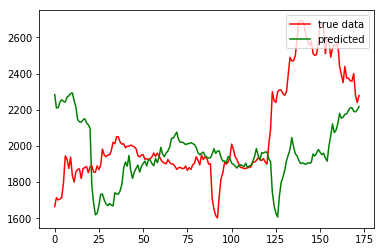

In [122]:
Y_pred = m_regr.predict(X_test)
print(Y_pred[-1])
ys_pred = get_ys(Y_pred)
ys_test = get_ys(Y_test)
#print(ys)
#print(higher[0])
x = range(len(ys_pred))
plt.plot(x, ys_test,color='red', label='true data')
plt.plot(x, ys_pred, color='green', label='predicted')

#plt.fill_between(x,higher,lower,edgecolor='#1B2ACC', facecolor='#089FFF')
plt.legend(loc = "upper right")
plt.show()